# Visualization Lab

The goal of this lab is to gain familiarity with a few of the many plotting options in the Matplotlib library.  We will begin by exploring how different colorbars affect the perception of your data and then make a few different plots to practice line plots, histograms, and box plots.  The goal of this lab is to make visualization you would be eager to share with others, so remember to include meaningful axes labels and titles.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Let's begin by generating some two dimensional data.  Run the code below to make a donut, but feel free to tweak the code to make other, more interesting data.

In [2]:
nx, ny = (200, 200)
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)

X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

z = np.sin(R*2.)**2

To plot this data, use the `pcolormesh` function in Matplotlib.  We will add a second plot to this figure next, so save some hassle and set it up as a subplot with `subplots`.  To make the plot look nice we also want to exercise some control over the axes to declutter them by setting the tick marks to be in intervals of 0.5.  It is important to show the color bar so others have a reference for the scale, which can be added with `colorbar`.

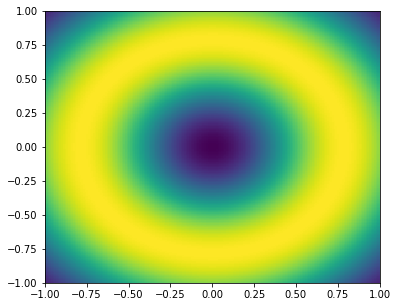

In [3]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
im = ax.pcolormesh(x, y, z)

The plot shows the data, but it isn't very informative.  To make the plot look nice we also want to exercise some control over the axes to declutter them by setting the tick marks to be in intervals of 0.5. Also, add "x Coordinate", and "y Coordinate" axes labels.  Remake the figure with this change.

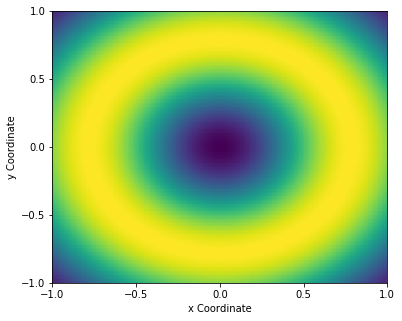

In [4]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
im = ax.pcolormesh(x, y, z)

ax.set_xticks([-1,-0.5,0.0,0.5,1])
ax.set_yticks([-1,-0.5,0.0,0.5,1])

ax.set_xlabel('x Coordinate')
ax.set_ylabel('y Coordinate');

Now we can see the data and know the axes, but we still don't know what the values are.  It is important to show the color bar so others have a reference for the scale, which can be added with colorbar.  Make this final change and remake the figure.

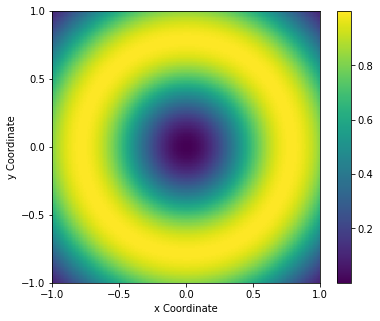

In [5]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
im = ax.pcolormesh(x, y, z)

ax.set_xticks([-1,-0.5,0.0,0.5,1])
ax.set_yticks([-1,-0.5,0.0,0.5,1])

ax.set_xlabel('x Coordinate')
ax.set_ylabel('y Coordinate')

fig.colorbar(im, ax=ax, orientation='vertical');

The 2D plot gives a good sense of the global function, but let's dive into it more by taking a slice through a row or column and show it in a second subplot.  Rather than assembling the entire plot in one go, let's build it step-by-step.  First, make a slice of the data, for instance horizontally through the 100th row (index 99).

In [6]:
cut = z[:,99]

To check that we've done things correctly, plot the graph of `x` vs the values of `cut`.

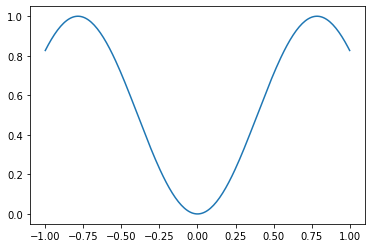

In [7]:
fig, ax = plt.subplots()
ax.plot(x, cut);

Let's again remake the plot with tidier ticks and label the axes.

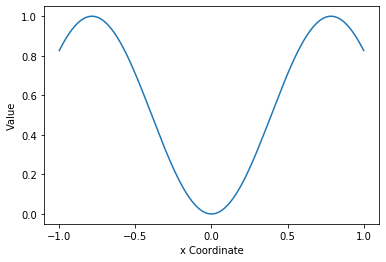

In [8]:
fig, ax = plt.subplots()
ax.plot(x, cut)
ax.set_xticks([-1,-0.5,0.0,0.5,1])
ax.set_xlabel('x Coordinate')
ax.set_ylabel('Value');

Between the 2D plot and the line plot, we have two nice looking plots.  Let's show each of them as subplots with the 2D plot as the first and the line plot as the second.  Be sure to include the formatting changes we have made.

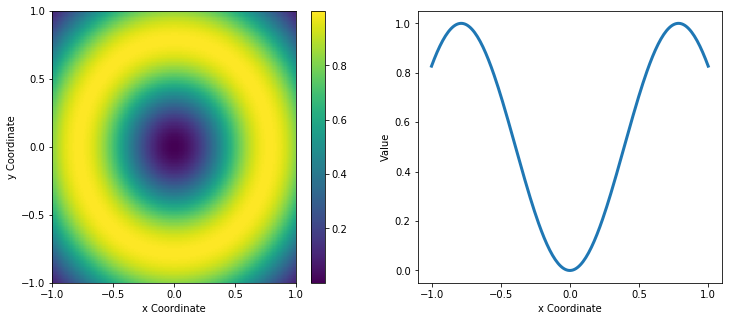

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
im1 = ax1.pcolormesh(x, y, z)
fig.colorbar(im1, ax=ax1, orientation='vertical')

ax1.set_xticks([-1,-0.5,0.0,0.5,1])
ax1.set_yticks([-1,-0.5,0.0,0.5,1])
ax1.set_xlabel('x Coordinate')
ax1.set_ylabel('y Coordinate')

im2 = ax2.plot(x, z[:,99], linewidth=3)

ax2.set_xticks([-1,-0.5,0.0,0.5,1])
ax2.set_xlabel('x Coordinate')
ax2.set_ylabel('Value');

Play around a bit with the color bars on the 2D plot to see which you like best and to understand how it affects perception.  The ones we saw in lecture (`jet`, `gray`, and `inferno`) are a good starting point, but feel free to try the others provided by Matplotlib.

Contour plots are also useful for visualizing 2D data.  Let's make one of our data with either `contour` for a normal contour plot or `contourf` for a filled contour plot.  `colorbar` will take on the role of showing the contour levels, which we can adjust with the `levels` parameter.  We can either explicitly pass levels in an array or simply tell it the number of level we want to plot.

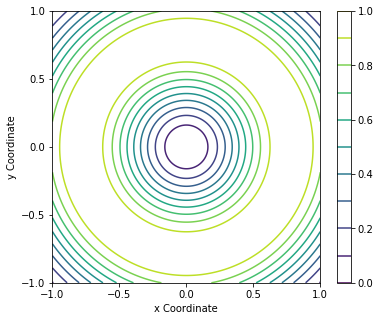

In [10]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
im = ax.contour(x, y, z, levels=10)
fig.colorbar(im, ax=ax, orientation='vertical')

ax.set_xticks([-1,-0.5,0.0,0.5,1])
ax.set_yticks([-1,-0.5,0.0,0.5,1])
ax.set_xlabel('x Coordinate')
ax.set_ylabel('y Coordinate');

Moving on to plots of summary statistics, lets begin by plotting a histogram of the data.

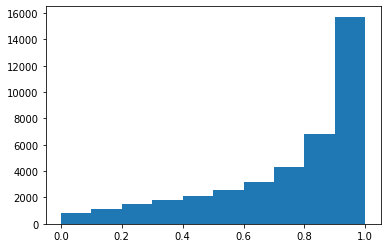

In [11]:
hist_data = z.flatten()    # need to flatten before feeding data to histogram

fig, ax = plt.subplots(1,1)
ax.hist(hist_data);

Let's make it look nicer by explicitly setting the limits on the x-axis, labeling the axes, and making the plot itself look nicer.  Refer to the `VisualizationDemos` notebook for an example of how to change the number of bins and the bar edge color.  Try adding useful things to the plot like a vertical line marking the mean value or text boxes.

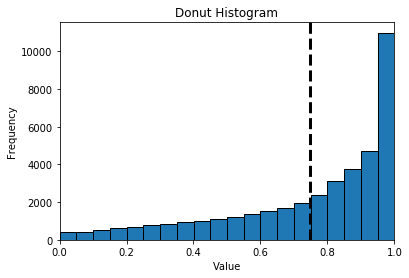

In [12]:
from matplotlib import colors

fig, ax = plt.subplots(1,1)
ax.hist(hist_data, bins=20, edgecolor='black')
ax.axvline(np.mean(z), color ='k', linestyle='--', linewidth=3)
ax.set_xlim([0,1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Donut Histogram');

The top level view we get from the histogram is useful, but lets look at the distributions of the pixel values more finely.  First, split the data into quarters long the vertical axis.  Then, make a box and whisker plots of the pixel values in these four regions.  Since `boxplot` expects a 1D sequence of values, we will first need to flatten the Numpy array with `flatten`.  For styling refer to the `draw_plot` function in the VisualizationDemos notebook.

In [13]:
region1 = z[:,:49].flatten()
region2 = z[:,49:99].flatten()
region3 = z[:,100:149].flatten()
region4 = z[:,150:].flatten()

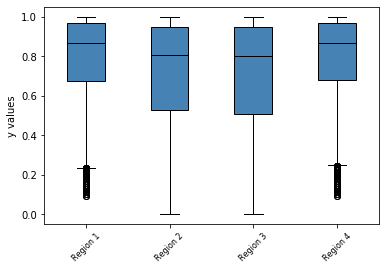

In [14]:
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color) 

fig, ax = plt.subplots()
draw_plot([region1, region2, region3, region4], 'black', 'steelblue')
ax.set_xticklabels(['Region 1', 'Region 2', 'Region 3', 'Region 4'],
                    rotation=45, fontsize=8);
ax.set_ylabel('y values');